In [7]:
import zipfile
import os

# Replace 'file_path.zip' with the path to your zip file
zip_file_path = '/content/drive/MyDrive/Time_Series _isualization.zip'
# Replace 'output_directory' with the path to the directory where you want to extract the files
output_directory = '/content/Time_Series _isualization'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_directory)

print(f"Files extracted to {output_directory}")


Files extracted to /content/Time_Series _isualization


In [10]:
import numpy as np
import pandas as pd
# Use pd.read_csv to call the function from pandas
df = pd.read_csv("/content/Time_Series _isualization/DailyDelhiClimateTrain.csv")

In [11]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [13]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [14]:
df.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [15]:
df.dropna(inplace=True)


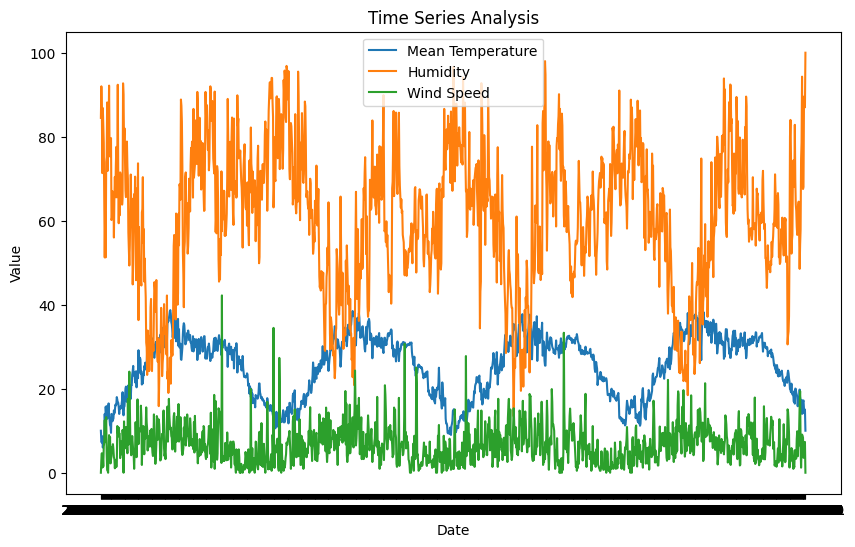

In [22]:
#Plot the time series for all variables
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['meantemp'], label='Mean Temperature')
plt.plot(df['date'], df['humidity'], label='Humidity')
plt.plot(df['date'], df['wind_speed'], label='Wind Speed')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Analysis')
plt.legend()
plt.show()


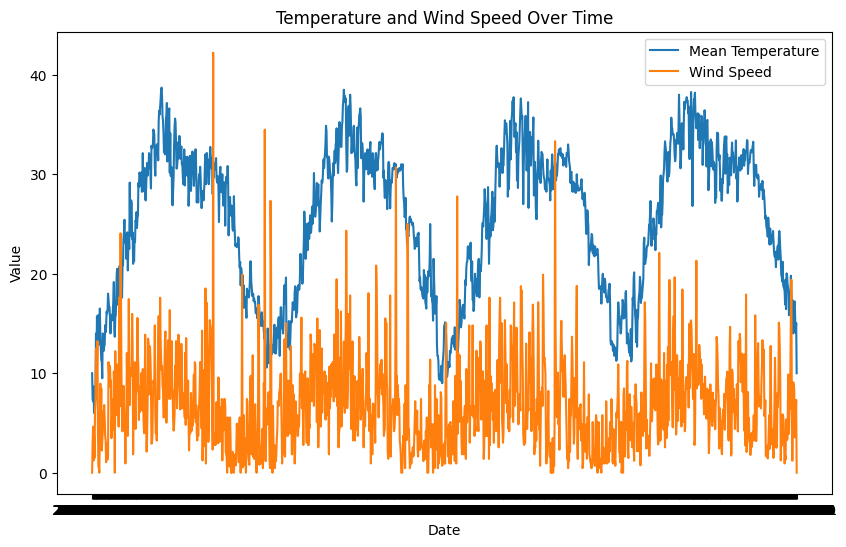

In [26]:
# Plot the time series for mean temperature and wind speed over time.
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['meantemp'], label='Mean Temperature')
plt.plot(df['date'], df['wind_speed'], label='Wind Speed')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Temperature and Wind Speed Over Time')
plt.legend()
plt.show()

In [27]:
#Decompose the time series for daily mean temperature into its components
 #(trend, seasonality, and residuals) using statistical decomposition methods
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose



In [28]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [30]:
decomposition = sm.tsa.seasonal_decompose(df['meantemp'], model='additive', period=365)  # Assuming yearly seasonality

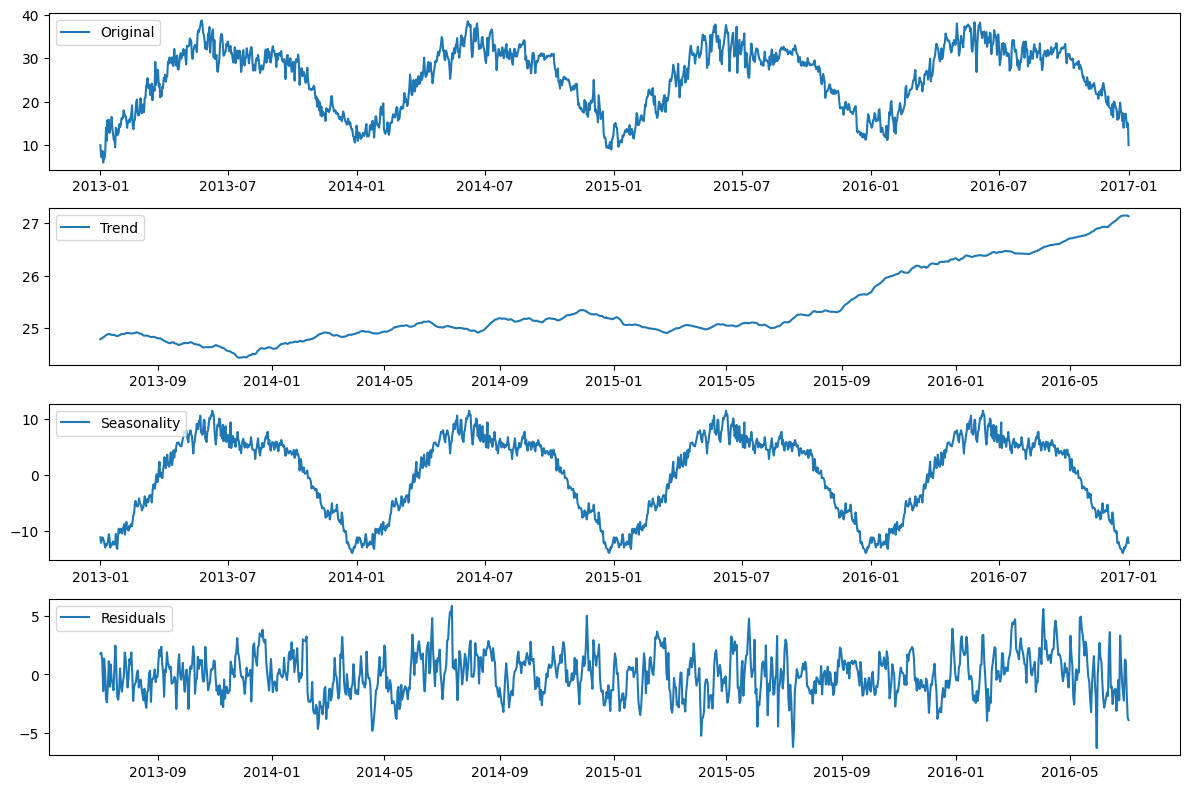

In [31]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['meantemp'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

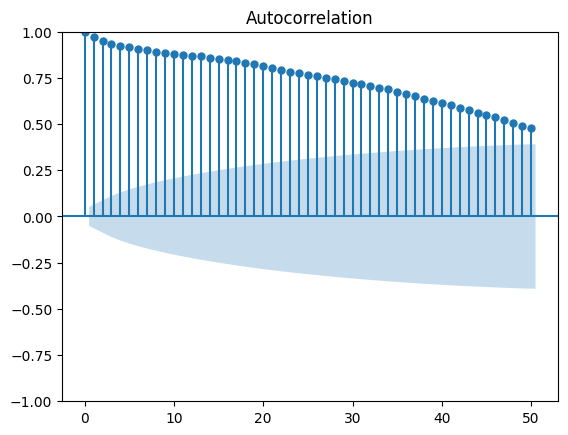

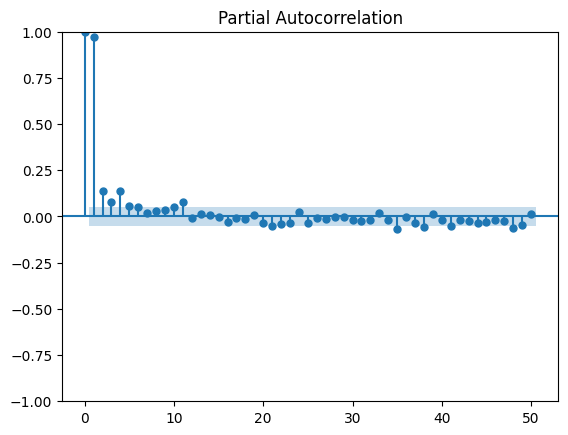

In [36]:
#Identify any seasonal patterns and discuss their significance.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Import plot_pacf

plot_acf(df['meantemp'], lags=50)  # Adjust lags as needed
plt.show()
plot_pacf(df['meantemp'], lags=50)  # Adjust lags as needed
plt.show()
#autocorrelation

In [37]:
#Select one variable (e.g., daily mean temperature) for forecasting.
# Select 'meantemp' (daily mean temperature) for forecasting.
selected_variable = 'meantemp'

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE): 2.7434667599018447
Root Mean Squared Error (RMSE): 3.4392102112552285


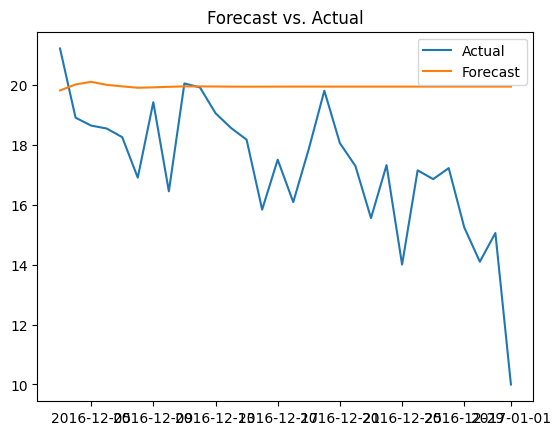

In [40]:
!pip install statsmodels

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA # Import ARIMA model


# 1. Select variable for forecasting (daily mean temperature)
selected_variable = 'meantemp'

# 2. Split the dataset into training and testing sets
# Assuming 'df' is your DataFrame with a 'date' index
train_data = df[:-30]  # Use all but the last 30 days for training
test_data = df[-30:]   # Use the last 30 days for testing

# 3. Fit STL model to the training set
stl = STL(train_data[selected_variable], seasonal=13, period=365)  # Assuming yearly seasonality
result = stl.fit()

# 4. Instead of forecasting directly from 'result',
#    fit a model (e.g., ARIMA) to the seasonally adjusted data
#    and use that for forecasting.
#    Here, we'll fit an ARIMA(5,1,0) model as an example.
#    You might need to experiment with different ARIMA orders (p, d, q).
seasonal_adj_data = result.seasonal + result.trend + result.resid  # Combine components

# Create and fit an ARIMA model
model = ARIMA(seasonal_adj_data, order=(5, 1, 0)) #order=(p,d,q)
model_fit = model.fit()

# Forecast on the test set using the ARIMA model
forecast = model_fit.forecast(steps=len(test_data))

# 5. Evaluate forecasting performance
mae = mean_absolute_error(test_data[selected_variable], forecast)
rmse = np.sqrt(mean_squared_error(test_data[selected_variable], forecast))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Optional: Plot the forecast against actual values
plt.plot(test_data.index, test_data[selected_variable], label='Actual')
plt.plot(test_data.index, forecast, label='Forecast')
plt.legend()
plt.title('Forecast vs. Actual')
plt.show()